In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

In [2]:
merged_final = pd.read_csv('merged_final_clean.csv')
merged_final.head(20)

,Date,Avg_Temp,Avg_Wind_Speed(mph),Precipitation(in),tripduration,starttime,stoptime,start station id,start station name,start station latitude,...,end station longitude,bikeid,usertype,birth year,gender,duration_mins,hourofday,dayofweek,month,age
0,2020-01-12 00:00:00.000,5.44,16.4,0.00,598,2020-01-12 10:27:51.398,2020-01-12 10:37:49.402,3147,E 85 St & 3 Ave,40.778012,...,-73.960940,41059,Subscriber,1964,Male,9.966667,10,Sunday,January,56
1,2020-09-12 00:00:00.000,7.28,10.5,0.02,736,2020-09-12 18:55:31.546,2020-09-12 19:07:48.507,4073,W 51 St & Rockefeller Plaza,40.759700,...,-73.994156,15688,Subscriber,1951,Male,12.266667,18,Saturday,September,69
2,2020-03-15 00:00:00.000,8.06,9.4,0.00,565,2020-03-15 10:53:20.261,2020-03-15 11:02:46.098,161,LaGuardia Pl & W 3 St,40.729170,...,-73.977688,41128,Subscriber,1988,Male,9.416667,10,Sunday,March,32
3,2020-09-10 00:00:00.000,17.00,6.7,0.00,1241,2020-09-10 14:01:24.443,2020-09-10 14:22:05.471,83,Atlantic Ave & Fort Greene Pl,40.683826,...,-73.979453,46614,Subscriber,1987,Female,20.683333,14,Thursday,September,33
4,2020-07-02 00:00:00.000,4.39,17.1,0.19,218,2020-07-02 16:05:13.246,2020-07-02 16:08:52.018,3609,Vernon Blvd & 31 Ave,40.769247,...,-73.930819,40182,Subscriber,1984,Male,3.633333,16,Thursday,July,36
5,2020-08-01 00:00:00.000,1.67,18.5,0.00,842,2020-08-01 15:32:50.816,2020-08-01 15:46:53.689,252,MacDougal St & Washington Sq,40.732264,...,-73.988021,33818,Subscriber,1974,Female,14.033333,15,Saturday,August,46
6,2020-11-21 00:00:00.000,10.67,13.6,0.00,275,2020-11-21 14:55:43.969,2020-11-21 15:00:19.757,3469,India St & West St,40.731814,...,-73.955086,30278,Subscriber,1968,Male,4.583333,14,Saturday,November,52
7,2020-07-08 00:00:00.000,23.83,8.3,0.22,1703,2020-07-08 19:59:26.138,2020-07-08 20:27:49.415,3295,Central Park W & W 96 St,40.791270,...,-73.982154,25264,Subscriber,1980,Male,28.383333,19,Wednesday,July,40
8,2020-12-29 00:00:00.000,3.22,10.3,0.00,366,2020-12-29 16:33:56.262,2020-12-29 16:40:02.719,361,Allen St & Hester St,40.716059,...,-73.979955,44312,Subscriber,1987,Male,6.100000,16,Tuesday,December,33
9,2020-08-30 00:00:00.000,24.06,14.8,0.01,1106,2020-08-30 15:46:11.336,2020-08-30 16:04:37.700,426,West St & Chambers St,40.717548,...,-73.999061,44606,Subscriber,1969,Female,18.433333,15,Sunday,August,51


In [3]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982934 entries, 0 to 982933
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Date                     982934 non-null  object 
 1   Avg_Temp                 982934 non-null  float64
 2   Avg_Wind_Speed(mph)      982934 non-null  float64
 3   Precipitation(in)        982934 non-null  float64
 4   tripduration             982934 non-null  int64  
 5   starttime                982934 non-null  object 
 6   stoptime                 982934 non-null  object 
 7   start station id         982934 non-null  int64  
 8   start station name       982934 non-null  object 
 9   start station latitude   982934 non-null  float64
 10  start station longitude  982934 non-null  float64
 11  end station id           982934 non-null  int64  
 12  end station name         982934 non-null  object 
 13  end station latitude     982934 non-null  float64
 14  end 

In [4]:
merged_final['Date'] = pd.to_datetime(merged_final['Date'])
merged_final['starttime'] = pd.to_datetime(merged_final['starttime'])
merged_final['stoptime'] = pd.to_datetime(merged_final['stoptime'])
merged_final['start station id'] = merged_final['start station id'].astype('str')
merged_final['end station id'] = merged_final['end station id'].astype('str')
merged_final['bikeid'] = merged_final['bikeid'].astype('str')
merged_final['usertype'] = merged_final['usertype'].astype('category')
merged_final['birth year'] = merged_final['birth year'].astype('int')
merged_final['gender'] = merged_final['gender'].astype('category')
merged_final['hourofday'] = merged_final['hourofday'].astype('str')
merged_final['how_cold'] = pd.cut(merged_final['Avg_Temp'], 5, labels=['very_cold', 'cold', 'normal', 'hot', 'very_hot'])

In [5]:
hourday = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hourdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=hourday)
merged_final['hourofday'] = merged_final['hourofday'].astype(hourdaycat)

In [6]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
merged_final['dayofweek'] = merged_final['dayofweek'].astype(weekdaycat)

In [7]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
merged_final['month'] = merged_final['month'].astype(monthcat)

In [8]:
# Let's set our size, base_color and style.
plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

## Who uses our bikes at what times of the day?

Analyzing the subscribers user type, we see two peaks, one in the morning around 8:00 and one in the evening around 17:00. The Subscribers data tends to indicate they use our bikes as a tool to go and come from work.

Checking the Customer user type, we see that there isn't really a peak, it's more a curve, and the highest point is around 17:00. This suggests the usage is more for leasure and not tied to specific times as it's spread out more evenly.

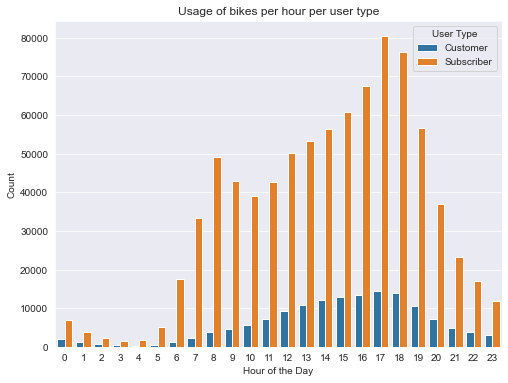

In [9]:
sb.countplot(data=merged_final, x='hourofday', hue='usertype');
plt.xlabel('Hour of the Day');
plt.ylabel('Count');
plt.title('Usage of bikes per hour per user type');
plt.legend(title = 'User Type');

## Does this differ per day?

The heatmaps on the top showing our customer type shows the peak being on the weekend overall.<br>
The bottom one , for the subscribers, shows that our peaks are in the weekdays and also at the same times, morning and evening.(Rush hour)<br>
The different patterns between the two is rather obvious, both still enjoying the occasional bike ride on the weekend.

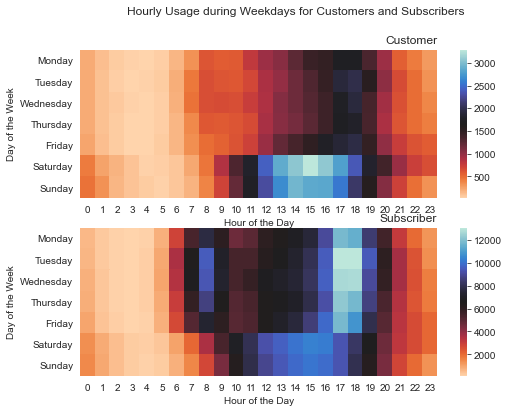

In [10]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = merged_final.query('usertype == "Customer"')
ct_counts = customers.groupby(['dayofweek', 'hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(ct_counts, cmap='icefire_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of the Day');
plt.ylabel('Day of the Week');

plt.subplot(2, 1, 2)
subscribers = merged_final.query('usertype == "Subscriber"')
st_counts = subscribers.groupby(['dayofweek', 'hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(st_counts, cmap='icefire_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of the Day');
plt.ylabel('Day of the Week');

## In what weather are Customers and Subscribers most likely to ride a bike?
Interestingly, it seems that Customers have a preference in temperature. The hotter it is, the more likely they are to hire a bike. <p>
On the Subscribers front, which we said were anual members, and tend to use the bike to go to and from work, they seem to mind less about temperature, as seen by the wider distribution.

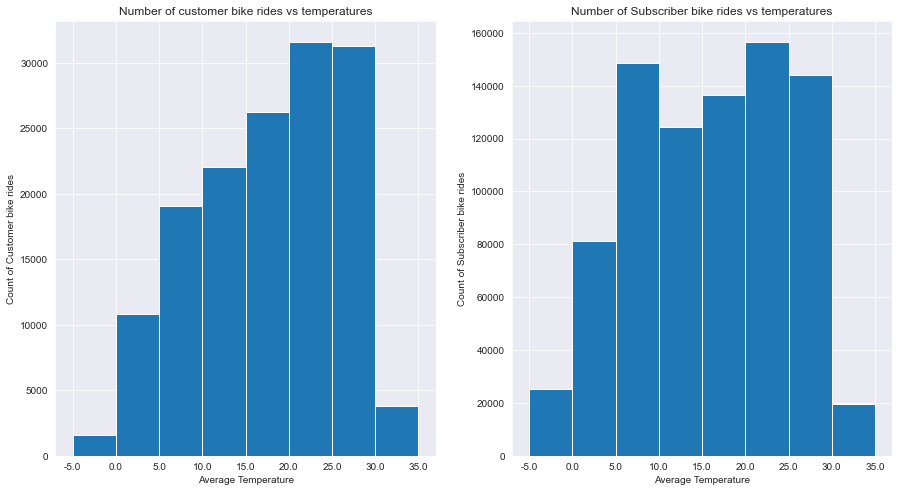

In [11]:
plt.figure(figsize = [15, 8]) 

plt.subplot(1, 2, 1) 
customers = merged_final.query('usertype == "Customer"')
bins = np.arange(-5, customers['Avg_Temp'].max()+5, 5)
plt.hist(data=customers, x='Avg_Temp', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Average Temperature');
plt.ylabel('Count of Customer bike rides');
plt.title('Number of customer bike rides vs temperatures');

plt.subplot(1, 2, 2) 
subscribers = merged_final.query('usertype == "Subscriber"')
bins = np.arange(-5, subscribers['Avg_Temp'].max()+5, 5)
plt.hist(data=subscribers, x='Avg_Temp', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Average Temperature');
plt.ylabel('Count of Subscriber bike rides');
plt.title('Number of Subscriber bike rides vs temperatures');

However, remember that the data of customers is a lot smaller. Next we'll see a graph to visualize both.

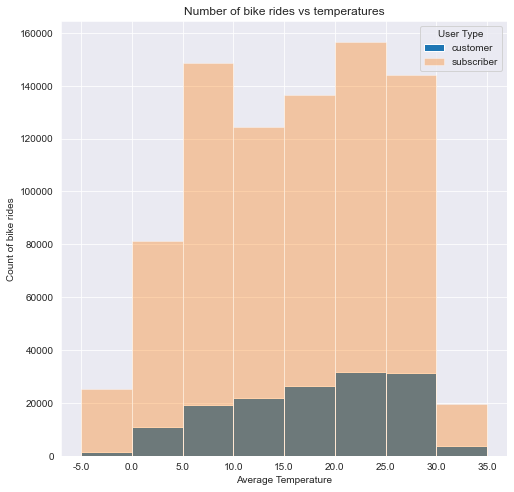

In [12]:
plt.figure(figsize = [8, 8]) 

customers = merged_final.query('usertype == "Customer"')
bins = np.arange(-5, customers['Avg_Temp'].max()+5, 5)
plt.hist(data=customers, x='Avg_Temp', bins=bins, alpha=1);
plt.xticks(bins, bins);

subscribers = merged_final.query('usertype == "Subscriber"')
bins = np.arange(-5, subscribers['Avg_Temp'].max()+5, 5)
plt.hist(data=subscribers, x='Avg_Temp', bins=bins, alpha=0.35);
plt.xticks(bins, bins);
plt.xlabel('Average Temperature');
plt.ylabel('Count of bike rides');
plt.title('Number of bike rides vs temperatures');
plt.legend(['customer', 'subscriber'], title = 'User Type');

## And how long are they likely to ride a bike, depending on the weather?
We can see that they Customers ride longer overall than the subscribers, however, we do see that for the Subscriber group, the trips lenght increases considerably if the weather is nicer.

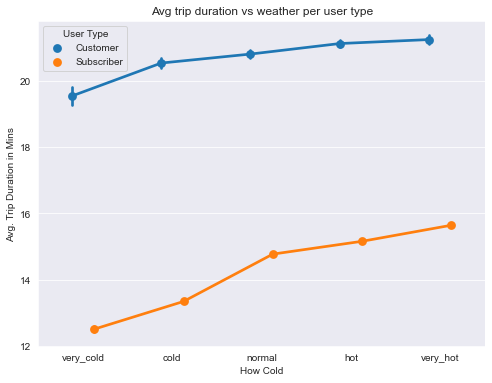

In [13]:
sb.pointplot(data=merged_final, x='how_cold', y='duration_mins', hue='usertype', dodge=0.25);
plt.xlabel('How Cold');
plt.ylabel('Avg. Trip Duration in Mins')
plt.title('Avg trip duration vs weather per user type')
plt.legend(title = 'User Type');